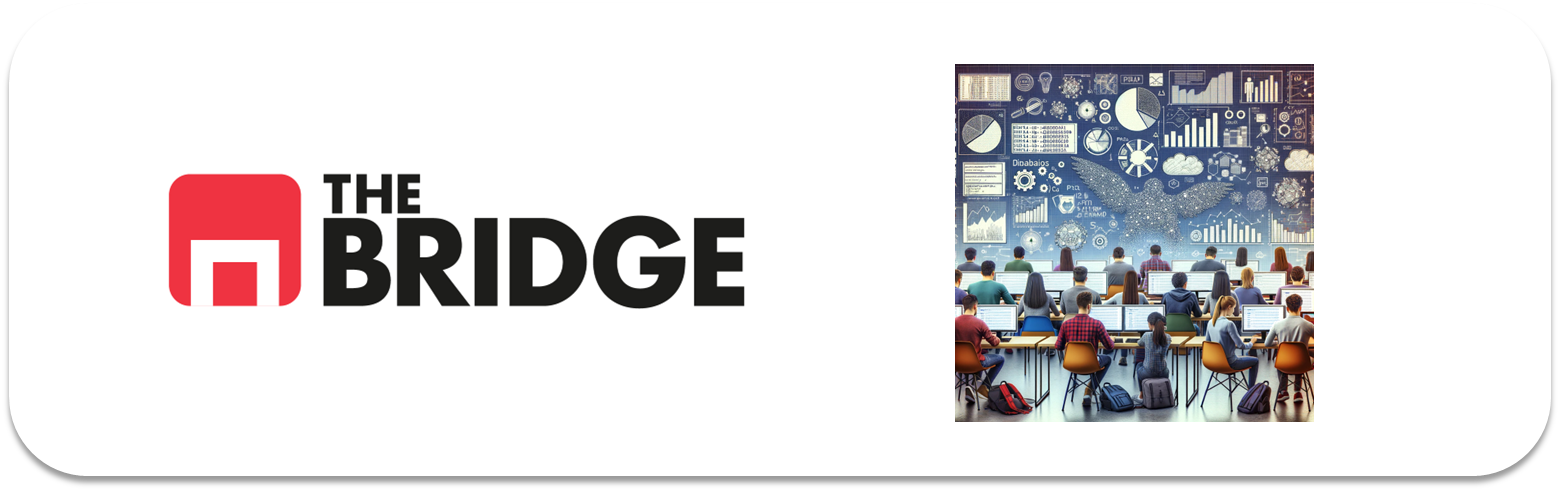

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



### Importación de paquetes y módulos

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

### 1. Carga del dataset

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### 2. Análisis de la variable target

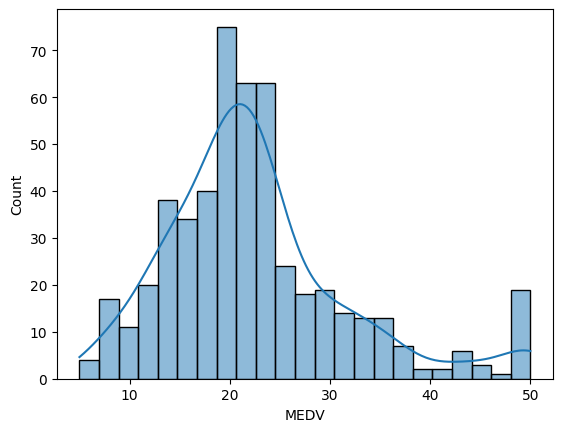

In [5]:
target = "MEDV" # valor medio de las viviendas en miles de dólares

sns.histplot(df[target], kde = True)
plt.show()

Es una variable numérica continua que sigue una distribución parecida a la normal pero con una ligera asímetría en la cola derecha, idónea para un modelo de regresión.

### 3. Separar Train y Test

In [6]:
# Separo usando la fucnión de sklearn, con un 80% para train y un 20% para test
from sklearn.model_selection import train_test_split

X = df.drop(columns= [target], axis = 1)
y = df[target].copy()

train_set_X, test_set_X, train_set_y, test_set_y = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [7]:
print(X.shape)
print(train_set_X.shape)
print(test_set_X.shape)
print(train_set_y.shape)
print(test_set_y.shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)


### 4. Mini-EDA

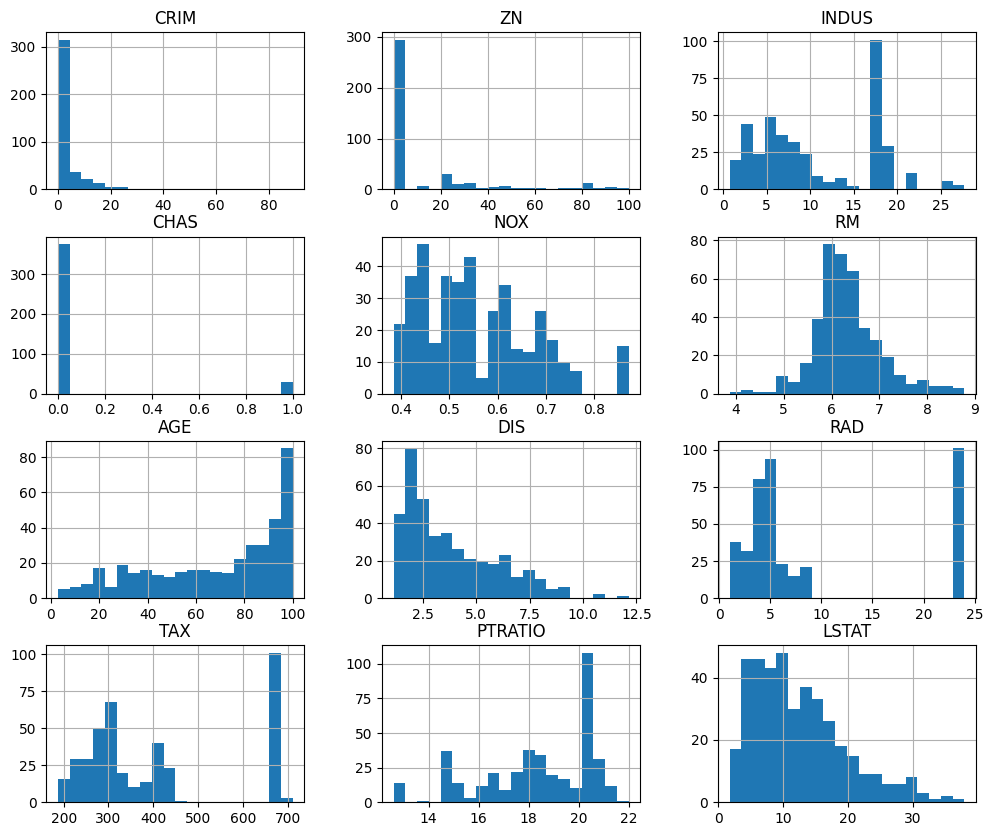

In [8]:
# Distribuciones
train_set_X.hist(bins = 20, figsize= (12, 10))
plt.show()

- La variable CHAS es binaria como ya sabíamos.
- La variable RM se aproxima a una distribución normal.
- Escalas muy diferentes en el eje X.

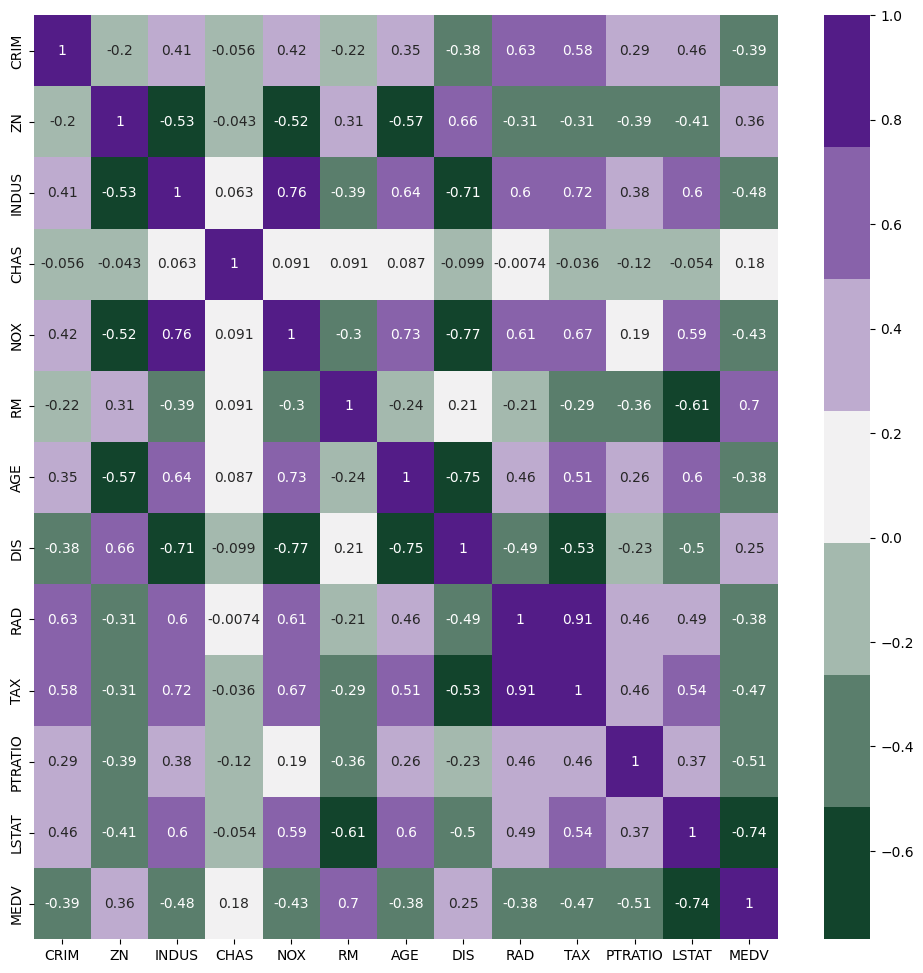

In [9]:
# Correlaciones
plt.figure(figsize= (12, 12))
sns.heatmap(df.corr(), annot= True, 
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),)
plt.show()

- Se puede apreciar que la variable target está fuertemente relacionada con RM (número promedio de habitaciones por vivienda) de forma positiva, y con LSTAT (% de población de estatus socioeconómico bajo) de forma negativa.
- CHAS tiene una baja correlación con todas las variables, pero de momento decido quedármela.
- Hay varias variables que también están altamente relacionadas entre sí, pero no me atrevo a descartar ninguna

In [10]:
features = X.columns.to_list()
features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

### 5. Tratar variables

Por la diferencia de escalas vistas en el eje X, voy a escalar mediante la estandarizaición

In [11]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
resultado = pd.DataFrame(std_scaler.fit_transform(train_set_X[features]), columns = features)
resultado.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,-0.165787


In [18]:
resultado.describe().loc[["mean", "std"]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
mean,-2.638154e-17,0.00000,-4.177077e-17,1.319077e-17,-5.111423e-16,-2.616169e-16,-4.858600e-16,5.248827e-17,-9.453384e-17,-1.516938e-16,8.519038e-16,-1.791746e-16
std,1.001240e+00,1.00124,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00


### 6. Construir modelo de regresión

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [21]:
# Entrenamos
lin_reg.fit(train_set_X, train_set_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [24]:
# Interpretación de los pesos
print(f"Intercepto: {lin_reg.intercept_}\n")

Intercepto: 36.97046906702997



In [31]:
coef_df = pd.DataFrame(lin_reg.coef_, index = features, columns= ["Coefficient"])
coef_df.Coefficient.sort_values(ascending= False)

RM          4.240098
CHAS        3.049477
RAD         0.239990
ZN          0.030795
INDUS       0.025248
AGE        -0.003594
TAX        -0.011275
CRIM       -0.127196
LSTAT      -0.537770
PTRATIO    -0.894845
DIS        -1.465507
NOX       -18.183246
Name: Coefficient, dtype: float64

A pesar de que CHAS estaba débilmente relacionado con la variable target, presenta uno de los valores más altos de los coeficientes, más que LSTAT (en valor absoluto). RM y NOX también tienen cierta importancia.

### 7. Evaluación del modelo

In [25]:
# predicciones
predictions = lin_reg.predict(test_set_X)
predictions

array([28.95821495, 36.28754087, 14.09883571, 25.03314354, 17.60196806,
       23.29436764, 17.41497772, 13.6889158 , 22.03729908, 20.30090287,
       24.79283915, 18.38832326, -4.33294443, 21.56693306, 19.2845309 ,
       25.21698591, 20.49872474,  4.58687634, 40.37044823, 16.25684307,
       27.23092232, 30.00757759, 11.48463522, 24.08876594, 17.58648051,
       15.31043178, 22.59893811, 17.89670956, 22.53685855, 18.88561711,
       22.39289985, 25.12908716, 24.4061559 , 16.95999671, 16.34608298,
       17.83812389, 31.23964364, 20.11355948, 23.97427249, 24.7026198 ,
       13.51365336, 32.23874536, 42.57623121, 17.23647236, 27.36800252,
       15.83869172, 14.36670582, 25.88507693, 19.14362342, 29.98338277,
       21.02214978, 34.30047435, 15.76119774, 26.0702547 , 39.32897786,
       21.57141303, 17.57577742, 32.79951673, 25.03333768, 12.7303957 ,
       22.41675169, 30.40352449, 31.53053337, 17.1501077 , 20.44580503,
       16.7365876 , 19.23921681, 25.97868876, 30.71818893, 15.06

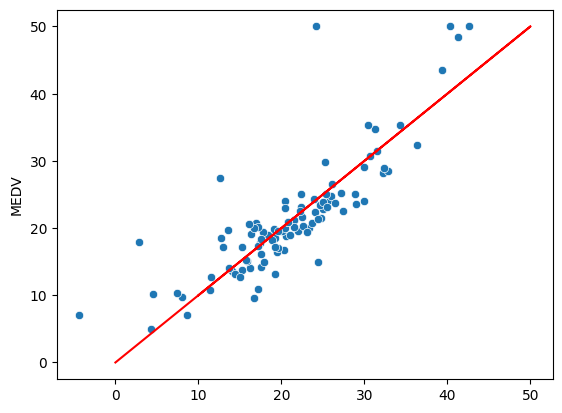

In [27]:
# comparación
sns.scatterplot(x = predictions, y = test_set_y)
plt.plot([0,50, 10], [0, 50, 10], "red")
plt.show()

Hay ciertos valores dispersos. Compruebo con las métricas de error:

In [29]:
# Evaluación a partir de las métricas de error

# Train error
pred_train = lin_reg.predict(train_set_X)
print('MAE train', metrics.mean_absolute_error(train_set_y, pred_train))
print('MSE train', metrics.mean_squared_error(train_set_y, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(train_set_y, pred_train)))
print('R2 train', lin_reg.score(train_set_X,train_set_y))

MAE train 3.4244687759495283
MSE train 22.60428647941742
RMSE train 4.754396542087904
R2 train 0.739801993681731


In [32]:
# Test error
print('MAE test', metrics.mean_absolute_error(test_set_y, predictions))
print('MSE test', metrics.mean_squared_error(test_set_y, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(test_set_y, predictions)))
print('R2 test', lin_reg.score(test_set_X,test_set_y))

MAE test 3.111377388238152
MSE test 22.777708563865886
RMSE test 4.7725997699226665
R2 test 0.6893967884614781


Los valores son similares, los más distintos son los de MAE.

### 8. Regularización

In [67]:
# Ridge
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE:", round(metrics.mean_absolute_error(train_set_y, ridgeR.predict(train_set_X)),2))
print("Test MAE:", round(metrics.mean_absolute_error(test_set_y, ridgeR.predict(test_set_X)),2))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.46
Test MAE: 3.08


Reduce ligeramente el error de test y aumenta ligeramente el de train

In [58]:
# Ridge
ridgeR = Ridge(alpha = 5) 
ridgeR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE:", round(metrics.mean_absolute_error(train_set_y, ridgeR.predict(train_set_X)),2))
print("Test MAE:", round(metrics.mean_absolute_error(test_set_y, ridgeR.predict(test_set_X)),2))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.45
Test MAE: 3.07


In [62]:
# Ridge
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE:", round(metrics.mean_absolute_error(train_set_y, ridgeR.predict(train_set_X)),2))
print("Test MAE:", round(metrics.mean_absolute_error(test_set_y, ridgeR.predict(test_set_X)),2))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.43
Test MAE: 3.06


Reduce el error de test y apenas aumenta el de train

In [48]:
# Lasso
lassoR = Lasso(alpha=0.1)
lassoR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE: %0.4f" % metrics.mean_absolute_error(train_set_y, lassoR.predict(train_set_X)))
print("Test MAE: %0.4f" % metrics.mean_absolute_error(test_set_y, lassoR.predict(test_set_X)))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.4709
Test MAE: 3.0944


In [50]:
# Lasso
lassoR = Lasso(alpha=0.02)
lassoR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE: %0.4f" % metrics.mean_absolute_error(train_set_y, lassoR.predict(train_set_X)))
print("Test MAE: %0.4f" % metrics.mean_absolute_error(test_set_y, lassoR.predict(test_set_X)))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.4129
Test MAE: 3.0619


In [65]:
# Lasso
lassoR = Lasso(alpha=0.015)
lassoR.fit(train_set_X, train_set_y)

print("Train MAE sin regularización:", round(metrics.mean_absolute_error(train_set_y, lin_reg.predict(train_set_X)),2))
print("Test MAE sin regularización:", round(metrics.mean_absolute_error(test_set_y, lin_reg.predict(test_set_X)),2))

print("Train MAE: %0.4f" % metrics.mean_absolute_error(train_set_y, lassoR.predict(train_set_X)))
print("Test MAE: %0.4f" % metrics.mean_absolute_error(test_set_y, lassoR.predict(test_set_X)))

Train MAE sin regularización: 3.42
Test MAE sin regularización: 3.11
Train MAE: 3.4126
Test MAE: 3.0697


### 9. Conclusiones

Me quedo con Ridge, ya que con Lasso se obtiene los mismos errores, pero Ridge no elimina pesos.